# LECTURE 2: Story Telling

Forest Fires
<br>Dataset: https://archive.ics.uci.edu/dataset/162/forest+fires

Instruction: Choose a dataset and perform a data storytelling, choose the proper data visualization, do not use words, your graphs must tell a story.

In [21]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd

forest_fires = fetch_ucirepo(id=162)

df = pd.DataFrame(forest_fires.data.features, columns=forest_fires.headers)

# month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
# day_order = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

# df = df.sort_values(by=['month', 'day'], key=lambda x: pd.Categorical(x, categories=month_order if x.name == 'month' else day_order))
df


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


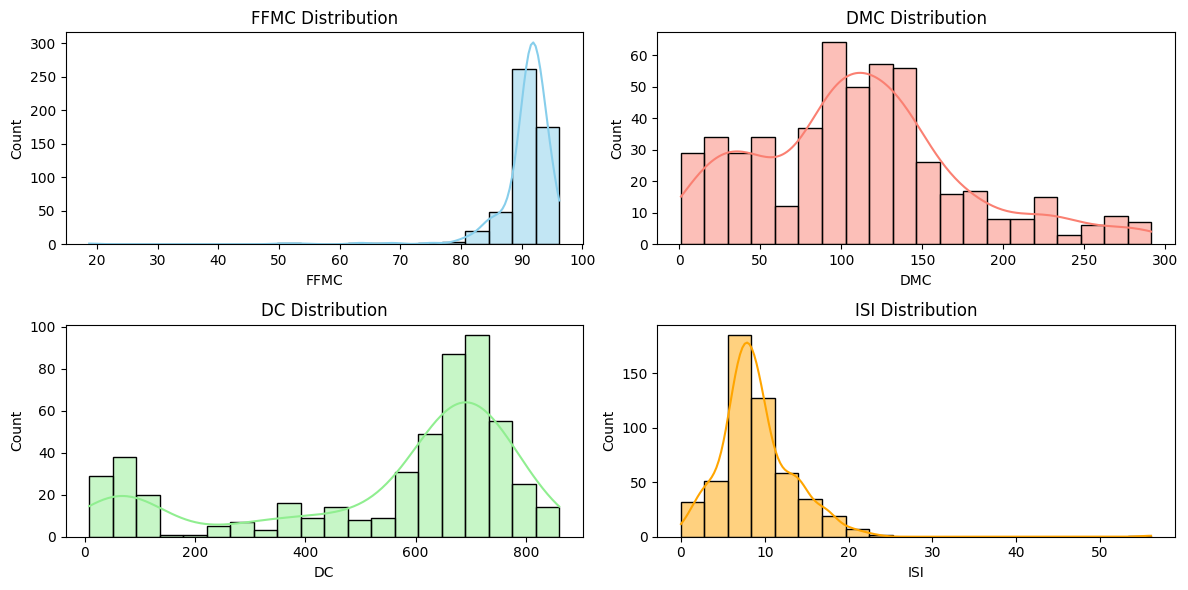

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['FFMC'], bins=20, kde=True, color='skyblue')
plt.title('FFMC Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['DMC'], bins=20, kde=True, color='salmon')
plt.title('DMC Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['DC'], bins=20, kde=True, color='lightgreen')
plt.title('DC Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['ISI'], bins=20, kde=True, color='orange')
plt.title('ISI Distribution')

plt.tight_layout()
plt.show()

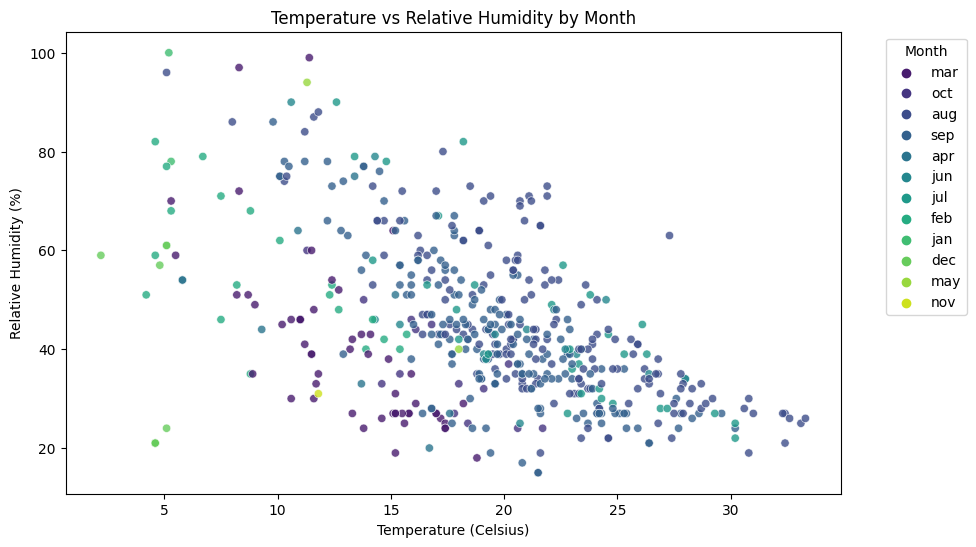

In [25]:
# Data Exploration (continued)
# Relationship between temperature and relative humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='RH', data=df, hue='month', palette='viridis', alpha=0.8)
plt.title('Temperature vs Relative Humidity by Month')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Relative Humidity (%)')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


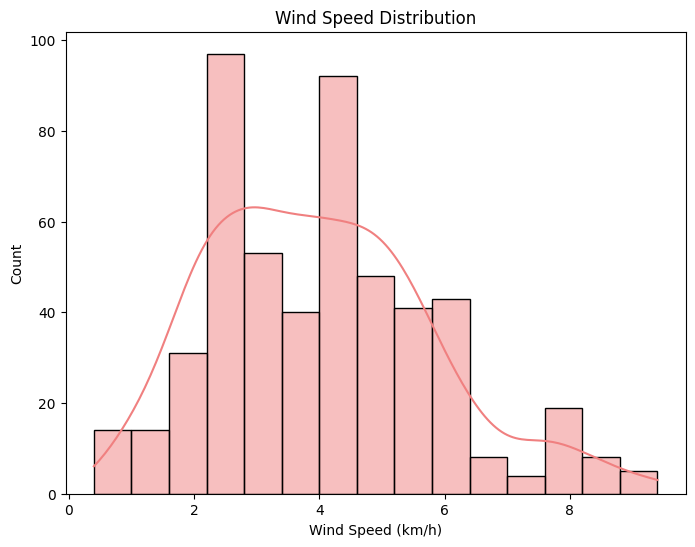

In [26]:
# Data Exploration (continued)
# Wind speed distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['wind'], bins=15, kde=True, color='lightcoral')
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (km/h)')
plt.show()


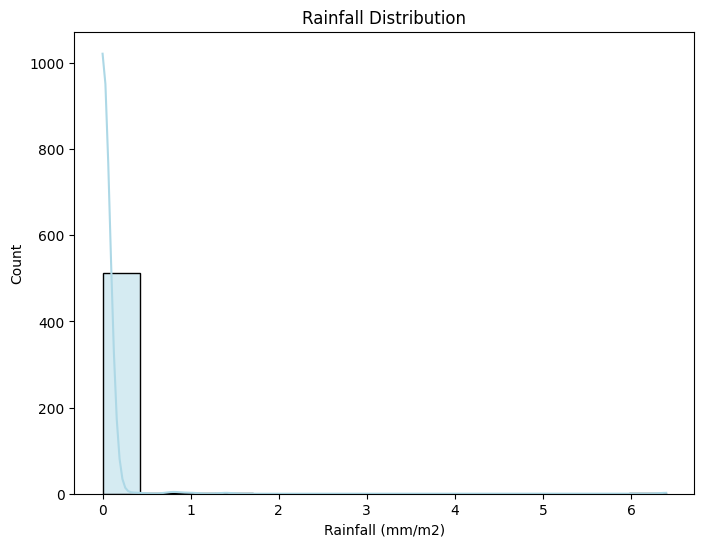

In [27]:
# Data Exploration (continued)
# Rainfall distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['rain'], bins=15, kde=True, color='lightblue')
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall (mm/m2)')
plt.show()


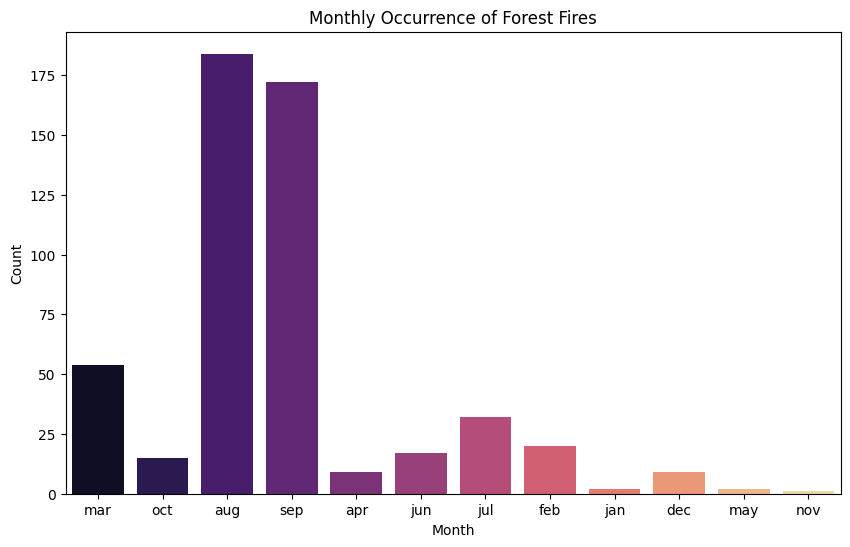

In [28]:
# Data Exploration (continued)
# Monthly occurrence of forest fires
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df, palette='magma')
plt.title('Monthly Occurrence of Forest Fires')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

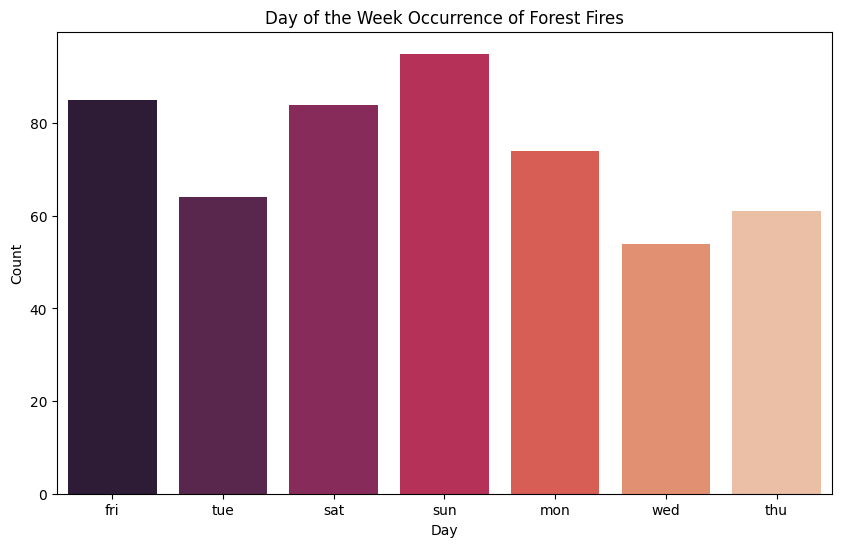

In [29]:
# Data Exploration (continued)
# Day of the week occurrence of forest fires
plt.figure(figsize=(10, 6))
sns.countplot(x='day', data=df, palette='rocket')
plt.title('Day of the Week Occurrence of Forest Fires')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()


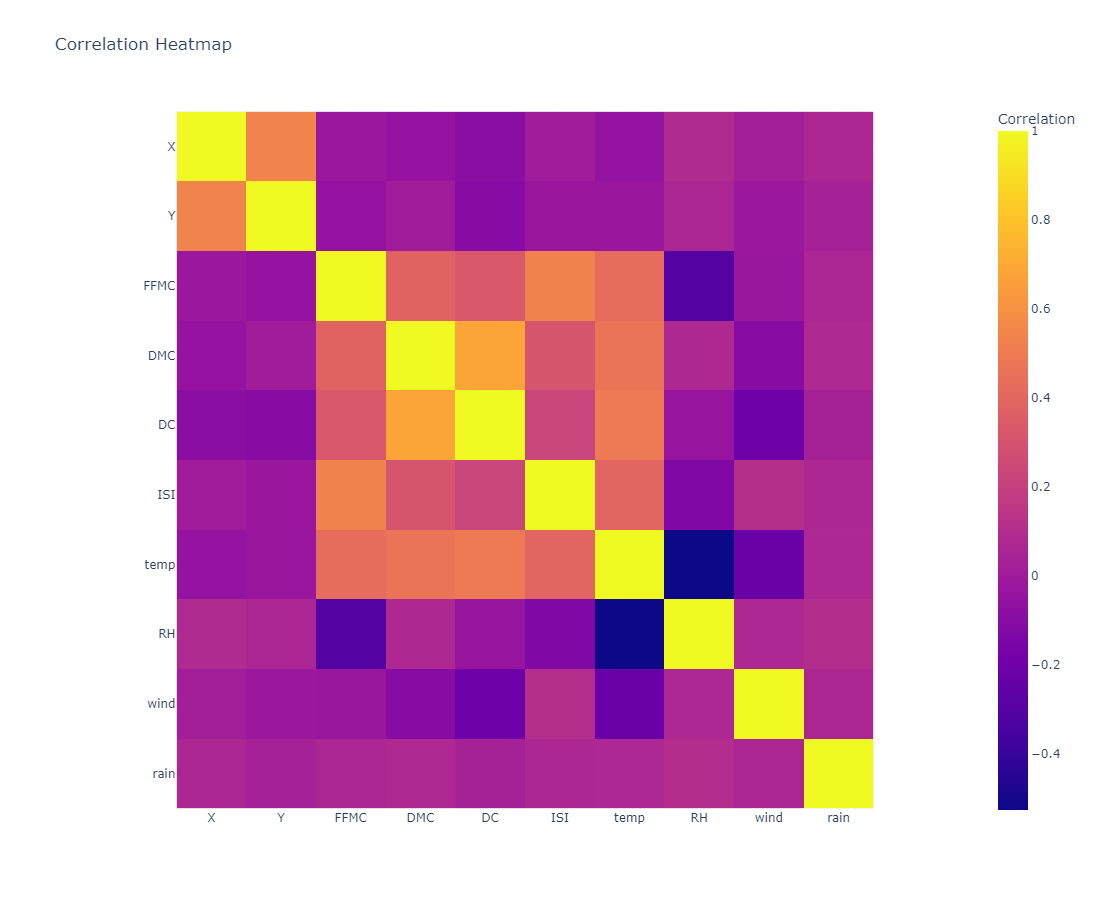

In [54]:
import plotly.express as px

# Exclude non-numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_columns.corr()

# Plot correlation heatmap using Plotly Express
fig = px.imshow(corr_matrix, 
                labels=dict(color="Correlation"), 
                x=corr_matrix.columns, 
                y=corr_matrix.columns,
                title='Correlation Heatmap')
fig.update_layout(height=900, width=900)
fig.show()